<h1> Retention analysis to figure out which employees may quit </h1>

In [1]:
#import for all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2> Load HR dataset and Employee Evaluation dataset</h2>

In [2]:
import os
print(os.getcwd())

/Users/deepika/Documents/DataScience Projects/Emp_Retention_Analysis


In [4]:
data_path = "/Users/deepika/Documents/DataScience Projects/Emp_Retention_Analysis/Data/"

In [5]:
hr_df = pd.read_csv(data_path+'hr_data.csv')
emp_eval = pd.read_excel(data_path+'employee_satisfaction_evaluation.xlsx')

In [186]:
hr_df.shape

(14999, 9)

There are around 14,999 rows and 9 columns in dataset

In [187]:
#Preview of first few records of dataset 
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [188]:
#View the bottom 5 rows of dataset
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [189]:
#Preview emp satisfaction data
emp_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [190]:
emp_eval.shape

(14999, 3)

<h2> Merge the datasets on emlpoyee number fields in both datasets </h2>

In [191]:
main_df = hr_df.set_index('employee_id').join(emp_eval.set_index("EMPLOYEE #"))

In [192]:
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [193]:
#Lets check the dataset for missing values 

In [194]:
(main_df.isnull().sum()/main_df.shape[0])*100

employee_id              0.000000
number_project           0.000000
average_montly_hours     0.000000
time_spend_company       0.000000
Work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
satisfaction_level       0.180012
last_evaluation          0.180012
dtype: float64

<h4> satisfaction_level and last_evaluation has about 0.1% of missing values</h4>

In [195]:
main_df[main_df.isnull().any(axis=1)]['left'].value_counts()

1    22
0    21
Name: left, dtype: int64

In [196]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4> Except Nan values the data is pretty much clean.As the count of rows with nans is very less. We can delete those rows </h4>

In [197]:
main_df.dropna(inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [198]:
main_df.columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary', 'satisfaction_level', 'last_evaluation'],
      dtype='object')

In [199]:
main_df.dtypes

employee_id                int64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
satisfaction_level       float64
last_evaluation          float64
dtype: object

In [200]:
main_df['left'].value_counts()

0    11407
1     3549
Name: left, dtype: int64

<h2> Exploratory Data Analysis </h2>

<h2> Univariate Analysis </h2>

In [201]:
def univariate_analysis(fieldname,pltname,xlabel,data):
    ax = sns.countplot(x=fieldname,data=main_df)
    plt.title(pltname)
    plt.xlabel(xlabel)
    count_val=(main_df[fieldname].value_counts()/main_df.shape[0])*100
    print(count_val)
    

0    76.270393
1    23.729607
Name: left, dtype: float64


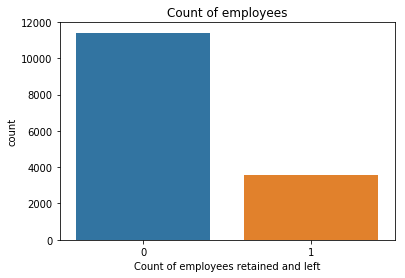

In [202]:
#Univariate Analysis of all fields which are categorical
univariate_analysis("left","Count of employees","Count of employees retained and left",main_df)

4    29.092003
3    27.046002
5    18.380583
2    15.920032
6     7.849692
7     1.711688
Name: number_project, dtype: float64


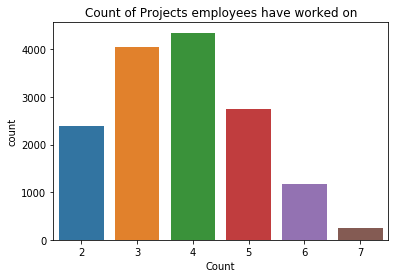

In [203]:
univariate_analysis("number_project","Count of Projects employees have worked on","Count",main_df)

3     42.952661
2     21.636801
4     17.076758
5      9.788714
6      4.787376
10     1.430864
7      1.243648
8      1.083177
Name: time_spend_company, dtype: float64


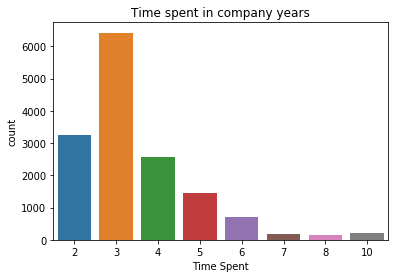

In [204]:
univariate_analysis("time_spend_company","Time spent in company years","Time Spent",main_df)

0    85.537577
1    14.462423
Name: Work_accident, dtype: float64


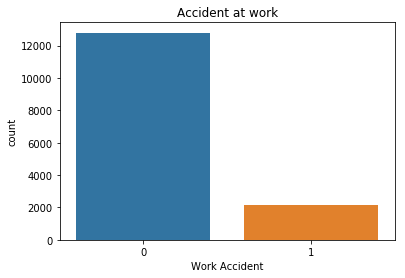

In [205]:
univariate_analysis("Work_accident","Accident at work","Work Accident",main_df)

0    97.880449
1     2.119551
Name: promotion_last_5years, dtype: float64


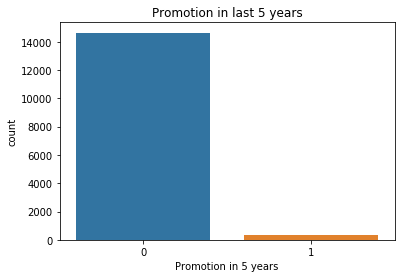

In [206]:
univariate_analysis("promotion_last_5years","Promotion in last 5 years","Promotion in 5 years",main_df)

sales          27.614335
technical      18.113132
support        14.863600
IT              8.184006
product_mng     6.010965
marketing       5.723455
RandD           5.255416
accounting      5.121690
hr              4.927788
management      4.185611
Name: department, dtype: float64


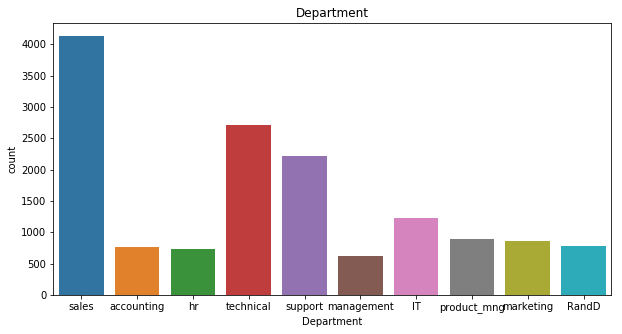

In [207]:
plt.figure(figsize=(10,5))
univariate_analysis("department","Department","Department",main_df)

In [208]:
main_df.columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary', 'satisfaction_level', 'last_evaluation'],
      dtype='object')

Text(0.5, 0, 'Average Monthly Hours')

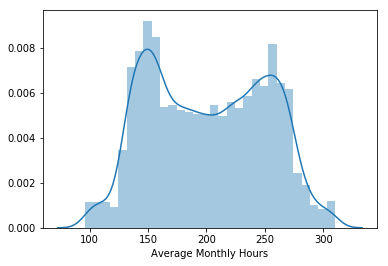

In [209]:
sns.distplot(main_df["average_montly_hours"])
plt.xlabel("Average Monthly Hours")

Text(0.5, 0, 'Satisfaction level')

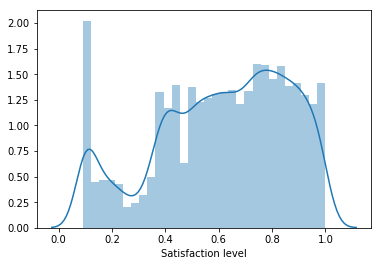

In [210]:
sns.distplot(main_df["satisfaction_level"])
plt.xlabel("Satisfaction level")

Text(0.5, 0, 'Last evaluation')

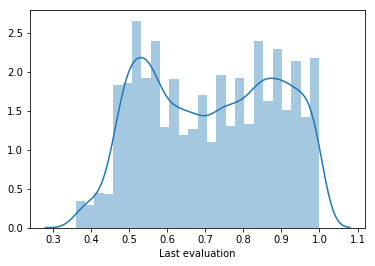

In [211]:
sns.distplot(main_df["last_evaluation"])
plt.xlabel("Last evaluation")

In [212]:
#Bivariate analysis
#Lets check employees from which department maximum employees have left
#main_df_final = main_df.drop("employee_id",axis=1)
#order_cust_2 = cust.groupby(['Customer No.','Invoice Date']).agg({'Total Amt Wtd Tax.':'sum','Labour Total':'sum'})
#group_dept = main_df.groupby(['department','left']).agg({'employee_id':'count'})

In [213]:
main_df_final = main_df.copy()

In [214]:
main_df_final = main_df.drop("employee_id",axis=1)

<h3> Bivariate Analysis </h3>

In [215]:
main_df["left"] = main_df["left"].replace(0,"No")
main_df["left"] = main_df["left"].replace(1,"Yes")

left,No,Yes,Total,Left %
department,,,,
IT,953,271,1224,22.140523
RandD,665,121,786,15.394402
accounting,563,203,766,26.501305
hr,523,214,737,29.036635
management,537,89,626,14.217252
marketing,653,203,856,23.714953
product_mng,702,197,899,21.913237
sales,3124,1006,4130,24.358354
support,1671,552,2223,24.831309


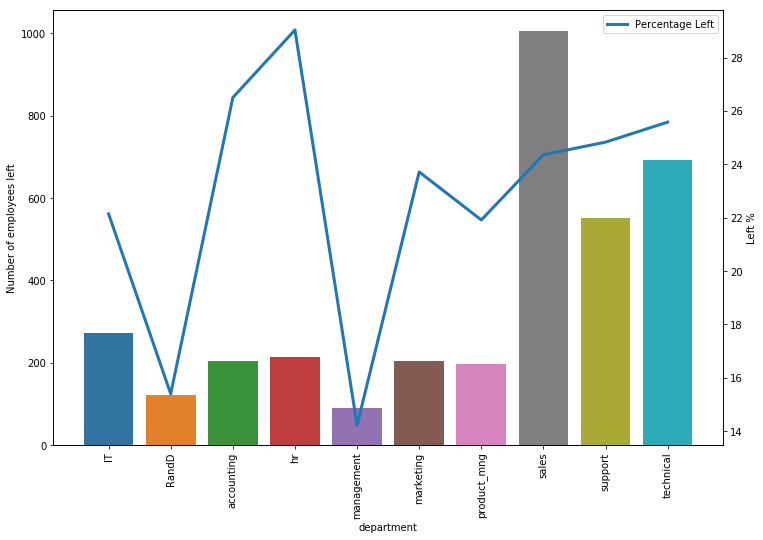

In [216]:
table1=pd.crosstab(main_df["department"],main_df["left"])
table1["Total"]=table1["No"]+table1["Yes"]
table1["Left %"]=(table1["Yes"]/table1["Total"])*100

fig,ax1=plt.subplots(figsize=(12,8))
sns.barplot(x=table1.index,y=table1["Yes"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of employees left")
ax2=ax1.twinx()
sns.lineplot(table1.index,table1["Left %"],ax=ax2,linewidth=3,label="Percentage Left")
table1

<h2> Correlation Matrix for checking if there are highly correlated features</h2>

In [222]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr(
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

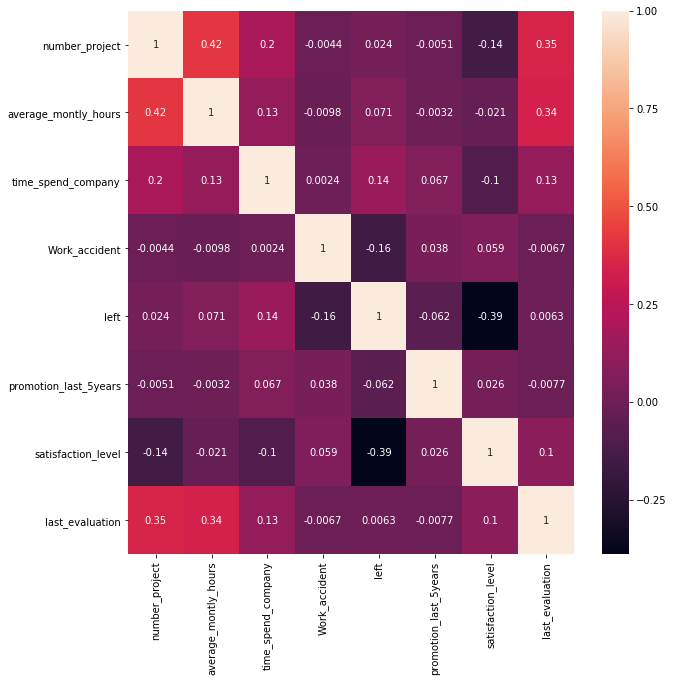

In [228]:
plt.figure(figsize=(10,10))
sns.heatmap(main_df_final.corr(), annot = True)

<h3> Prepare Dataset for Machine Learning </h3>

In [ ]:
#Department and Salary are categorical columns. 
#Perform One hot encoding on categorical columns to change them to numeric

In [229]:
categorical = ['department','salary']
main_df_final_bk = main_df_final.copy

In [230]:
main_df_final = pd.get_dummies(main_df_final)

In [232]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,...,0,0,0,0,1,0,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,...,0,0,0,0,1,0,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,...,0,0,0,0,1,0,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,...,0,0,0,0,1,0,0,0,1,0


In [233]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14956 entries, 0 to 14998
Data columns (total 21 columns):
number_project            14956 non-null int64
average_montly_hours      14956 non-null int64
time_spend_company        14956 non-null int64
Work_accident             14956 non-null int64
left                      14956 non-null int64
promotion_last_5years     14956 non-null int64
satisfaction_level        14956 non-null float64
last_evaluation           14956 non-null float64
department_IT             14956 non-null uint8
department_RandD          14956 non-null uint8
department_accounting     14956 non-null uint8
department_hr             14956 non-null uint8
department_management     14956 non-null uint8
department_marketing      14956 non-null uint8
department_product_mng    14956 non-null uint8
department_sales          14956 non-null uint8
department_support        14956 non-null uint8
department_technical      14956 non-null uint8
salary_high               14956 non-null 

In [235]:
from sklearn.model_selection import train_test_split
X = main_df_final.drop(['left'],axis=1)
y = main_df_final['left']

In [236]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Let's Train a Logistic Regression Model

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.63%
[[3162  275]
 [ 639  411]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3437
           1       0.60      0.39      0.47      1050

   micro avg       0.80      0.80      0.80      4487
   macro avg       0.72      0.66      0.67      4487
weighted avg       0.78      0.80      0.78      4487



/Users/deepika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Let's Try a Random Forest Classifer

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

/Users/deepika/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 98.86%
[[3425   12]
 [  39 1011]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3437
           1       0.99      0.96      0.98      1050

   micro avg       0.99      0.99      0.99      4487
   macro avg       0.99      0.98      0.98      4487
weighted avg       0.99      0.99      0.99      4487



<h2> Lets check the feature importance of each features </h2>

In [242]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
number_project,0.240988
satisfaction_level,0.238777
time_spend_company,0.177869
average_montly_hours,0.147877
last_evaluation,0.143184
salary_low,0.009691
Work_accident,0.008792
salary_high,0.004411
department_sales,0.004379
salary_medium,0.003924


## Displaying the Classification Report and Confusion Matrix

In [243]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3425   12]
 [  39 1011]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3437
           1       0.99      0.96      0.98      1050

   micro avg       0.99      0.99      0.99      4487
   macro avg       0.99      0.98      0.98      4487
weighted avg       0.99      0.99      0.99      4487

